# Modeling Reddit Submissions:

### The NLP modeling process is broken down as follows:

Classifying Submissions:
   - 1. Logistic Regression:
       - CountVectorizer
       - TF-IDF
   - 2. Naieve Bayes
       - CountVectorizer
       - TF-IDF
   - 3. SVM
       - CountVectorizer
       - TF-IDF

Hyperparameters are further defined under each section, below. This section cocnludes with model evaluation using ROC AUC and a mapping of selected model coefficients back to corresponding words.

In [136]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import classification_report

from nltk.stem import WordNetLemmatizer

## 1. Classifying Submissions:

In [66]:
# Read in merged CSV:

df_sub = pd.read_csv('../data/merged_submissions.csv')

In [67]:
# Define X and y:

X = df_sub['title']
y = df_sub['subreddit']

In [68]:
# Execute Train/Test Split on Submissions:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [69]:
# Check y:

df_sub['subreddit'].value_counts()

1    12000
0    12000
Name: subreddit, dtype: int64

In [70]:
# Define function to lemmatize text:

def split_into_lemmas(text):
    text = text.lower()
    lemmer = WordNetLemmatizer()
    return "".join([lemmer.lemmatize(word) for word in text])

# Code adapted from GA DSI Local Lesson: NLP

### 1A) Logistic Regression + CountVectorizer:

In [71]:
# NOTE: Fitting 720 models, can take 15+ minutes to run.

# Pipeline 1:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])
# Pipeline 1 parameters:
pipe1_params = {
    'cvec__max_features': [3000, 4000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__strip_accents': ['ascii', 'unicode', None],   
    'cvec__preprocessor': [split_into_lemmas, None],
    'cvec__stop_words':[None],
    'lr__C': np.linspace(.001, 3, 5),
    'lr__penalty': ['l1', 'l2']
}
# GridSearchCV1:
gs1 = GridSearchCV(pipe1,
                  param_grid = pipe1_params,
                  n_jobs = -1,
                  cv = 5)
# Fit GridSearch to training data:
print('Fitting models. This could take 15+ minutes. Might want to grab coffee...')
gs1.fit(X_train, y_train)

# Score Model:
print(f'Training score: {gs1.score(X_train, y_train)}')
print(f'Test score    : {gs1.score(X_test, y_test)}')
print(f'Best params   : {gs1.best_params_}')

Fitting models. This could take 15+ minutes. Might want to grab coffee...
Training score: 0.9416111111111111
Test score    : 0.8946666666666667
Best params   : {'cvec__max_features': 4000, 'cvec__ngram_range': (1, 1), 'cvec__preprocessor': None, 'cvec__stop_words': None, 'cvec__strip_accents': 'ascii', 'lr__C': 1.5005, 'lr__penalty': 'l2'}


In [72]:
#ROC AUC SCORE

### 1B) Logistic Regression + TF-IDF:

In [73]:
# NOTE: Fitting 720 models, can take 15+ minutes to run.

# Pipeline 2:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])
# Parameters:
pipe2_params = {
     'tvec__max_features': [3000, 4000],
     'tvec__ngram_range': [(1,1), (1,2)],
     'tvec__strip_accents': ['ascii', 'unicode', None],   
     #'tvec__preprocessor': [split_into_lemmas, None],
     'tvec__stop_words':[None],
     'lr__C': np.linspace(.001, 3, 5),
     'lr__penalty': ['l1', 'l2']
}
# GridSearchCV2:
gs2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params, 
                  n_jobs=-1,
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 15+ minutes. Might want to grab coffee...')
gs2.fit(X_train, y_train)

# Score Model:
print(f'Training score: {gs2.score(X_train, y_train)}')
print(f'Test score    : {gs2.score(X_test, y_test)}')
print(f'Best params   : {gs2.best_params_}')

Fitting models. This could take 15+ minutes. Might want to grab coffee...
Training score: 0.9280555555555555
Test score    : 0.8906666666666667
Best params   : {'lr__C': 3.0, 'lr__penalty': 'l2', 'tvec__max_features': 4000, 'tvec__ngram_range': (1, 1), 'tvec__preprocessor': None, 'tvec__stop_words': None, 'tvec__strip_accents': 'unicode'}


### 2A) Multinomial Naive Bayes + CountVectorizer: 


In [74]:
# NOTE: Fitting 360 models, can take 15+ minutes to run.

# Pipeline 3:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])
# Parameters:
pipe3_params = {
    'cvec__max_features': [3000, 4000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__strip_accents': ['ascii', 'unicode', None],   
    'cvec__preprocessor': [split_into_lemmas, None],
    'cvec__stop_words':[None],
    'nb__alpha': [1,2,5]
}
# GridSearchCV3:
gs3 = GridSearchCV(pipe3,
                  param_grid=pipe3_params,
                   n_jobs=-1,
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 15+ minutes. Might want to grab coffee...')
gs3.fit(X_train, y_train)

# Score Model:
print(f'Training score: {gs3.score(X_train, y_train)}')
print(f'Test score    : {gs3.score(X_test, y_test)}')
print(f'Best params   : {gs3.best_params_}')

Fitting models. This could take 15+ minutes. Might want to grab coffee...
Training score: 0.8873333333333333
Test score    : 0.8735
Best params   : {'cvec__max_features': 4000, 'cvec__ngram_range': (1, 1), 'cvec__preprocessor': <function split_into_lemmas at 0x1a28f07320>, 'cvec__stop_words': None, 'cvec__strip_accents': 'ascii', 'nb__alpha': 1}


### 2B) Multinomial Naive Bayes + TF-IDF:

In [75]:
# NOTE: Fitting 360 models, can take 15+ minutes to run.

# Pipeline 4:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
# Parameters:
pipe4_params = {
    'tvec__max_features': [3000, 4000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'tvec__ngram_range': [(1,1), (1,2)],
    'tvec__strip_accents': ['ascii', 'unicode', None],   
    'tvec__preprocessor': [split_into_lemmas, None],
    'tvec__stop_words':[None],
    'nb__alpha': [1,2,5]
}
# GridSearchCV4:
gs4 = GridSearchCV(pipe4,
                  param_grid=pipe4_params,
                  n_jobs=-1, 
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 15+ minutes. Might want to grab coffee...')
gs4.fit(X_train, y_train)

# Score Model:
print(f'Training score: {gs4.score(X_train, y_train)}')
print(f'Test score    : {gs4.score(X_test, y_test)}')
print(f'Best params   : {gs4.best_params_}')

Fitting models. This could take 15+ minutes. Might want to grab coffee...
Training score: 0.8961666666666667
Test score    : 0.8765
Best params   : {'nb__alpha': 1, 'tvec__max_features': 4000, 'tvec__ngram_range': (1, 1), 'tvec__preprocessor': <function split_into_lemmas at 0x1a28f07320>, 'tvec__stop_words': None, 'tvec__strip_accents': 'ascii'}


### 3A) Support Vector Machine/Classifier (SVC) + Count Vecotrizer:

In [76]:
# NOTE: Fitting 60 models, can take 30+ minutes to run.

# Pipeline 5:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])
# Parameters:
pipe5_params = {
    'cvec__max_features': [3000,4000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'cvec__ngram_range': [(1,1)],
    'cvec__strip_accents': ['ascii', 'unicode', None],   
    'cvec__preprocessor': [split_into_lemmas, None],
    'cvec__stop_words':[None, 'english'], 
    'svc__degree': [2],
    
}
# GridSearchCV5:
gs5 = GridSearchCV(pipe5,
                  param_grid=pipe5_params,
                  n_jobs=-1, 
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 30+ minutes. Might want to grab coffee...')
gs5.fit(X_train, y_train)  

# Score Model:
print(f'Training score: {gs5.score(X_train, y_train)}')
print(f'Test score    : {gs5.score(X_test, y_test)}')
print(f'Best params   : {gs5.best_params_}')

Fitting models. This could take 30+ minutes. Might want to grab coffee...
Training score: 0.9346666666666666
Test score    : 0.8833333333333333
Best params   : {'cvec__max_features': 4000, 'cvec__ngram_range': (1, 1), 'cvec__preprocessor': <function split_into_lemmas at 0x1a28f07320>, 'cvec__stop_words': None, 'cvec__strip_accents': 'ascii', 'svc__degree': 2}


### 3B) Support Vector Machine/Classifier (SVC) + TF-IDF:

In [77]:
# NOTE: Fitting 120 models, can take 30+ minutes to run.

# Pipeline 6:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', SVC())
])
# Parameters:
pipe6_params = {
    'tvec__max_features': [3000, 4000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'tvec__ngram_range': [(1,1)],
    'tvec__strip_accents': ['ascii', 'unicode', None],   
    'tvec__preprocessor': [split_into_lemmas, None],
    'tvec__stop_words':['english', None],
    'svc__degree': [2]
}
# GridSearchCV6:
gs6 = GridSearchCV(pipe6,
                  param_grid=pipe6_params,
                  n_jobs=-1, 
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 30+ minutes. Might want to grab coffee...')
gs6.fit(X_train, y_train)  

# Score Model:
print(f'Training score: {gs6.score(X_train, y_train)}')
print(f'Test score    : {gs6.score(X_test, y_test)}')
print(f'Best params   : {gs6.best_params_}')

Fitting models. This could take 30+ minutes. Might want to grab coffee...
Training score: 0.9745555555555555
Test score    : 0.8985
Best params   : {'svc__degree': 2, 'tvec__max_features': 4000, 'tvec__ngram_range': (1, 1), 'tvec__preprocessor': None, 'tvec__stop_words': None, 'tvec__strip_accents': 'unicode'}


## Model Evaluation:

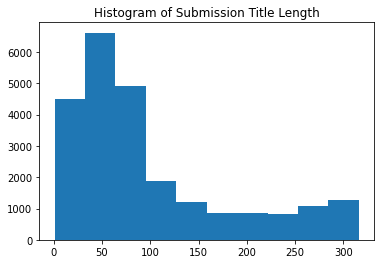

In [85]:
# Length of each title in Characters:
lengths_of_posts = [len(each) for each in X]
plt.hist(lengths_of_posts)
plt.title('Histogram of Submission Title Length');

In [98]:
# GS1 and GS6 had the highest model accuracy score. Going with GS1 for the sake of avoiding black-box algorithms.

In [92]:
# Calculate ROC AUC

def roc(probas, true, step=0.01):

    probas = probas[:,1]  
    true = true.values    
    assert(len(probas) == len(true)) 
    
    TPRs = [] 
    FPRs = [] 
    
    for i in np.arange(0.0,1.0,step): 
        preds_class = probas > i 
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): 

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) 
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();
    
# Code adapted from GA-DC-DSI Lab 4.02

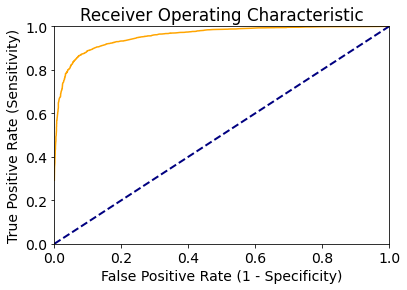

<Figure size 504x648 with 0 Axes>

In [93]:
probabilities = gs1.predict_proba(X_test)

roc(probas = probabilities, true = y_test, step=0.001);            

In [161]:
# Calculate predictions for AUC score:

preds=gs1.predict(X_test)
preds.shape

(6000,)

In [164]:
# AUC SCORE:
auc = roc_auc_score(y_test, preds)
auc

0.8947566084067601

In [108]:
# Generate Coeffs mapped to words:

coefs = gs1.best_estimator_.named_steps.lr.coef_  

log_coefs = pd.DataFrame(gs1.best_estimator_.named_steps.lr.coef_ , 
                        columns=gs1.best_estimator_.named_steps.cvec.get_feature_names())

log_coefs

# Code adapted from the genius of Derek McAdam, GA-DC-DSI-CC11

In [3]:
#top10_coef = log_coefs.T.sort_values(0, ascending=False).head(10)

#print(top10_coef)

In [176]:
bottom10_coef = log_coefs.T.sort_values(0, ascending=False).tail(10)

In [177]:
bottom10_coef

,0
ufos,-2.209850
whatweknow,-2.367184
agenda,-2.444272
conspiracies,-2.489887
ufo,-2.504394
epstein,-2.606458
aliens,-2.641336
illuminati,-2.901315
conspiracy,-3.434392
mandela,-3.713829


In [178]:
# Append Data:

df = bottom10_coef.append(top10_coef)
df = pd.DataFrame(df)
df

,0
ufos,-2.209850
whatweknow,-2.367184
agenda,-2.444272
conspiracies,-2.489887
ufo,-2.504394
epstein,-2.606458
aliens,-2.641336
illuminati,-2.901315
conspiracy,-3.434392
mandela,-3.713829


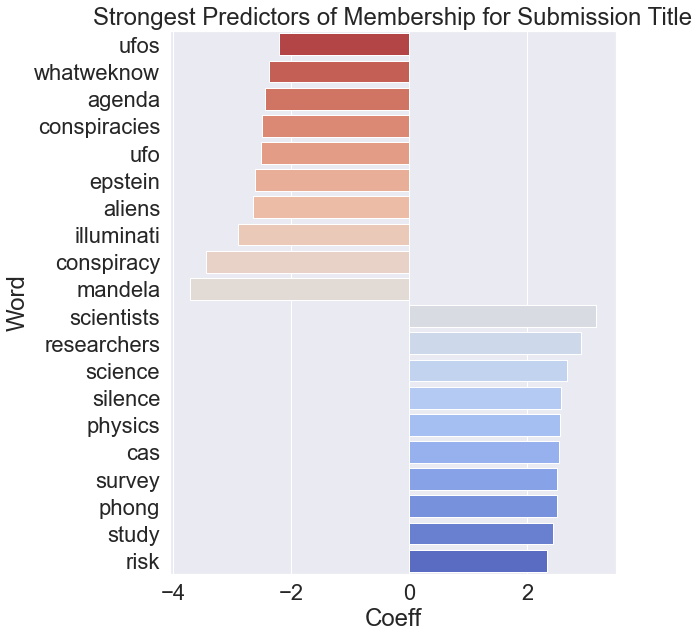

In [201]:
# Generate plot of strongest predictors of membership on coefficient:

sns.set(font_scale=2)
plt.figure(figsize=(8, 10))
ax4 = sns.barplot(data=df, 
                  x=0, 
                  y = df.index,
                
                  palette = 'coolwarm_r'
                 )
ax4.set(xlabel='Coeff', ylabel='Word', title='Strongest Predictors of Membership for Submission Title')
plt.show()